In [1]:
# Import libraries

import pandas as pd 
from sklearn.datasets import load_diabetes

In [2]:
# Data Ingestion

diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)
df['target'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [29]:
# Divide the data into dependent and independent columns

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

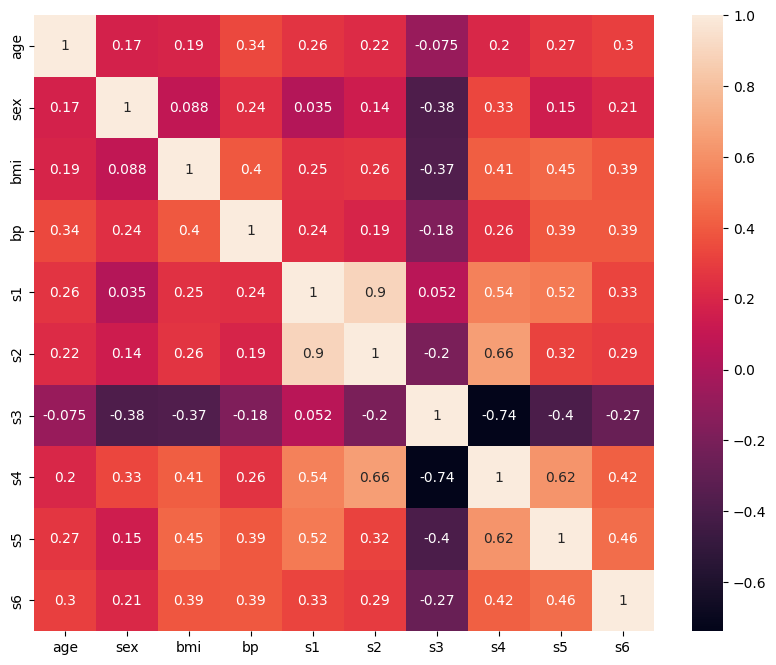

In [30]:
correlation_matrix = X.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
X = X.drop('s1', axis=1)
X.head()

,age,sex,bmi,bp,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [32]:
# Train and Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
models = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet(alpha = 0.1, l1_ratio=0.5)
}

In [37]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    adjusted_r2 = 1- (1-r2)*(len(y_test)-1)/ (len(y_test)-X_test.shape[1]-1)
    print("Model :",name)
    print("RMSE :",rmse)
    print("Adjusted R2",adjusted_r2)
    print("*************************************************")

Model : LinearRegression
RMSE : 53.17337704214167
Adjusted R2 0.4379180154211715
*************************************************
Model : Ridge
RMSE : 53.15887099089648
Adjusted R2 0.4382246530036974
*************************************************
Model : Lasso
RMSE : 52.780750667256726
Adjusted R2 0.44618807293743135
*************************************************
Model : ElasticNet
RMSE : 52.9834079998208
Adjusted R2 0.4419270681669648
*************************************************
